In [1]:
import os
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from argparse import ArgumentParser
from torch.optim import SGD, Adam
from torch.optim.lr_scheduler import CosineAnnealingLR
from torchsummary import summary

#### Generating Data Set

In [2]:
def f1(D,eps):
    return 0.5*(1-np.tanh(D/(2*eps)))

In [3]:
def f2(D,eps):
    return 0.25*((np.tanh(D/(2*eps)))**2-1)

In [4]:
# Generate radius
def radius(R1,R2,N):
    h=(R1-R2)/(N-1)
    time=[]
    R=[]
    for i in range(N):
        c=h*i
        time=time+[c]
        R+=[R1-c]
    R[-1]=round(R[-1],2)
    return R,time

In [5]:
import numpy as np 
import math
import matplotlib.pyplot as plt 

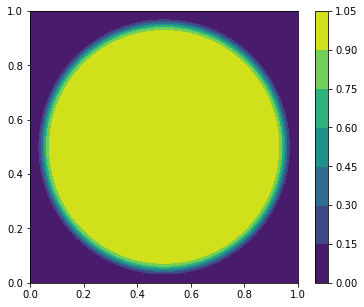

In [6]:
import numpy as np 
import math
import matplotlib.pyplot as plt 
#N=2**8
a = np.linspace(0,1,2**8)  
b = np.linspace(0,1,2**8) 
eps=0.01
xa, xb = np.meshgrid(a,b)
d=np.sqrt((xa-0.5)**2+(xb-0.5)**2)-0.45
sol=f1(d,eps)
fig = plt.figure(figsize =(6, 5)) 
plt.contourf(xa, xb, sol)  
plt.colorbar()  
plt.show()  

In [7]:
### Generate training data set
def train_data(R,f,eps,delta,N,M):
    X=np.empty((N, M, M))
    Y=np.empty((N, M, M))
    a = np.linspace(0,1,M)  
    b = np.linspace(0,1,M) 
    xa, xb = np.meshgrid(a,b)
    for i in range(N):
        d1=np.sqrt((xa-0.5)**2+(xb-0.5)**2)-R[i]
        d2=np.sqrt((xa-0.5)**2+(xb-0.5)**2)-np.sqrt(R[i]**2-2*delta)
        X[i]=f(d1,eps)
        Y[i]=f(d2,eps)
    return X,Y   

In [8]:
M=2**8
N=100
R,time=radius(0.45,0.05,N)
eps=0.01
delta=eps**2
X,Y=train_data(R,f1,eps,delta,N,M)

In [9]:
values=[[X[i],Y[i]] for i in range(N)]
keys=[i for i in range(N)]
DATA = {k:v for k, v in zip(keys, values)}

In [10]:
#values=np.array(values)
#values[0].shape

In [11]:
data_set=torch.utils.data.DataLoader(DATA, batch_size=10, shuffle=True, num_workers=1)

In [12]:
# Class Dataset
class MyDataset():
    def __init__(self):
        self.dat = DATA
        
    def __getitem__(self, index):
        data = self.dat[index]
        
        return data, index

    def __len__(self):
        return len(self.dat)

In [13]:
dataset = MyDataset()
loader = DataLoader(dataset,
                    batch_size=10,
                    shuffle=True,
                    num_workers=1)

In [210]:
#Test datastet
M=2**8
N=100
R_test,time_test=radius(0.44,0.04,N)
eps=0.01
delta=eps**2
X_test,Y_test=train_data(R_test,f1,eps,delta,N,M)
test_values=[[X_test[i],Y_test[i]] for i in range(N)]
test_keys=[i for i in range(N)]
TESTDATA = {k:v for k, v in zip(test_keys, test_values)}
TESTDATA ={test_keys[0]:test_values[0]}
class MyDataset():
    def __init__(self):
        self.dat = TESTDATA
        
    def __getitem__(self, index):
        data = self.dat[index]
        
        return data, index

    def __len__(self):
        return len(self.dat)
testdata = MyDataset()
testloader = DataLoader(testdata,
                    batch_size=1,
                    shuffle=True,
                    num_workers=1)

In [61]:
# Test roundedx
import copy
def roundedx(xa,xb,w,r,eps):
    xa1=copy.deepcopy(xa)
    xb1=copy.deepcopy(xb)
    xa1=abs(xa)
    xb1=abs(xb)
    a=np.minimum(xa1+xb1,w)*0.5
    d=np.sqrt((xa1-a)**2+(xb1-a)**2)-r
    u=0.5*(1-np.tanh(d/(2*eps)))
    return u

def test_data(f,W,R,eps,N,M):
    m=len(W)
    n=len(R)
    k=1
    X=np.empty((N, M, M))
    a1 = np.linspace(-2,2,M)  
    b1 = np.linspace(-2,2,M) 
    xa, xb = np.meshgrid(a1,b1)
    for i in range(m):
        X[i]=f(xa,xb,W[i],R[0],eps)
    for j in range(m,N):
        X[j]=f(xa,xb,W[m-1],R[k],eps)
        k+=1
    return X 

eps=0.02
M=2**8
N=20
Wr=[1.5-i*0.1 for i in range(15)]
Rr=[0.6-0.1*i for i in range(6)]
X_test=test_data(roundedx,Wr,Rr,eps,N,M)
class MyDataset():
    def __init__(self):
        self.dat = X_test
        
    def __getitem__(self, index):
        data = self.dat[index]
        
        return data, index

    def __len__(self):
        return len(self.dat)
testdata = MyDataset()
testloader = DataLoader(testdata,
                    batch_size=10,
                    shuffle=True,
                    num_workers=1)


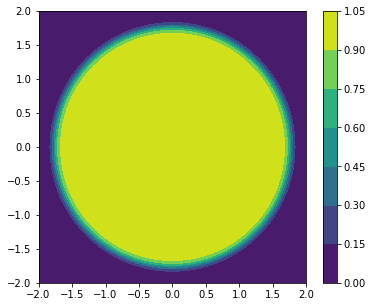

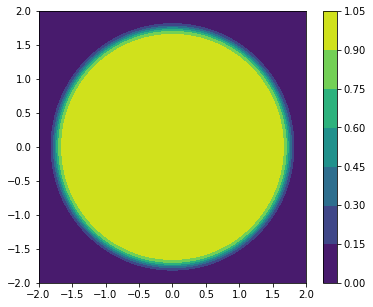

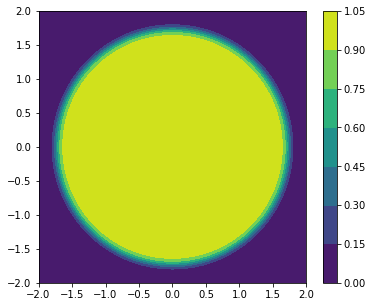

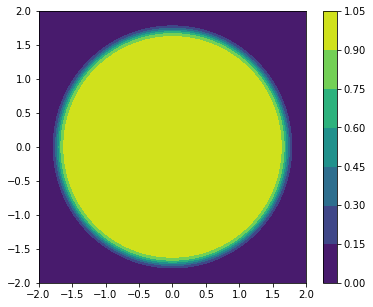

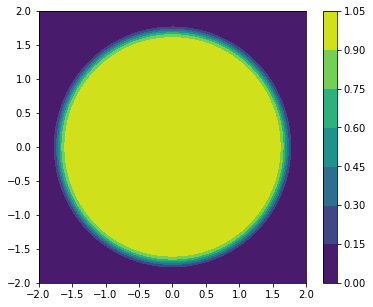

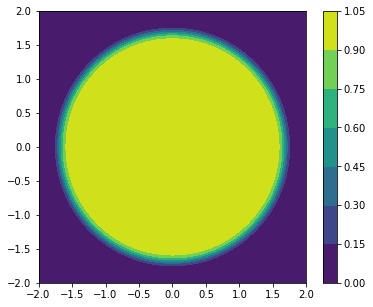

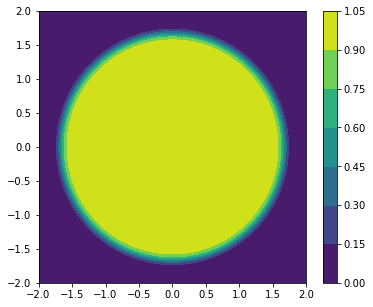

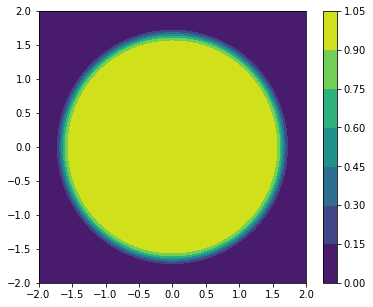

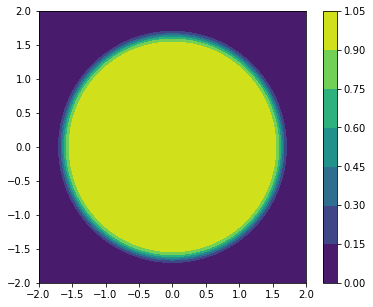

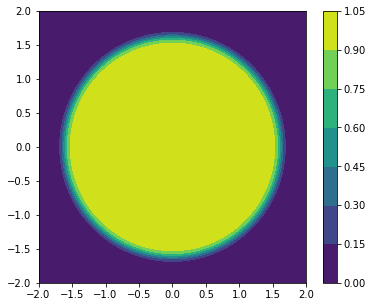

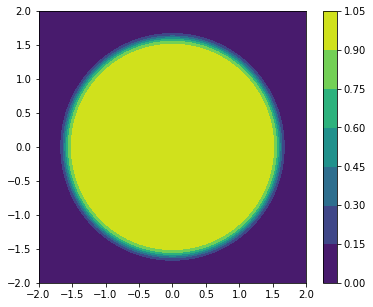

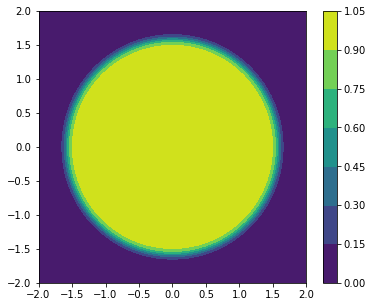

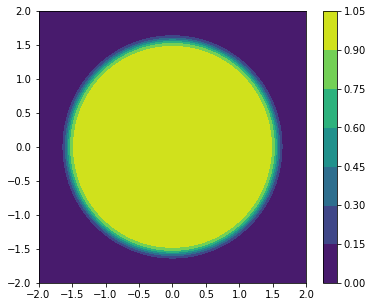

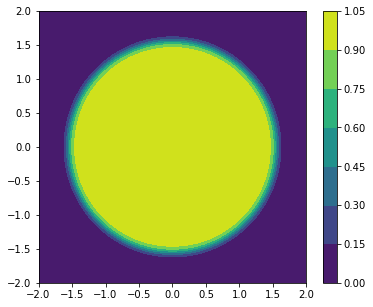

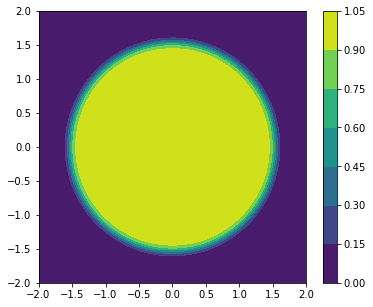

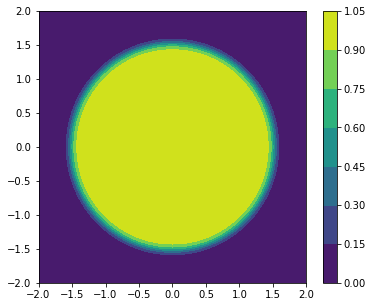

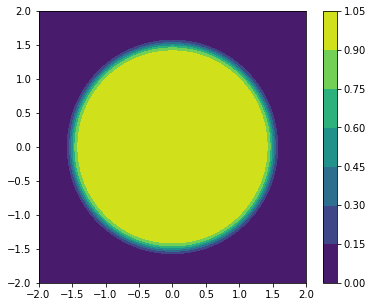

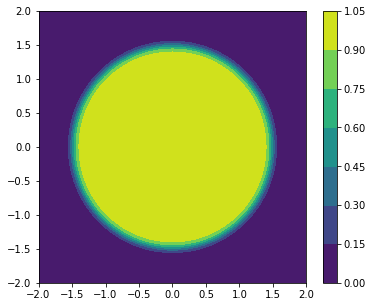

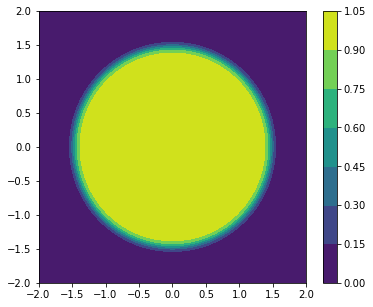

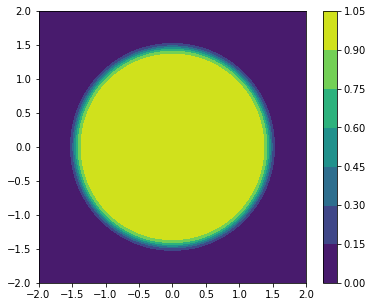

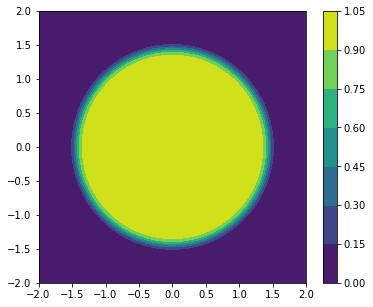

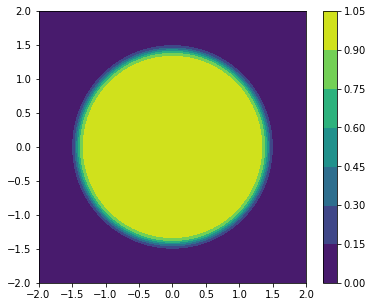

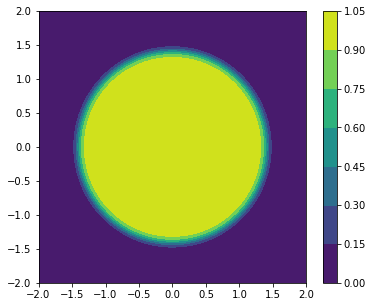

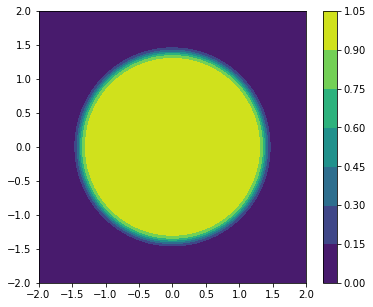

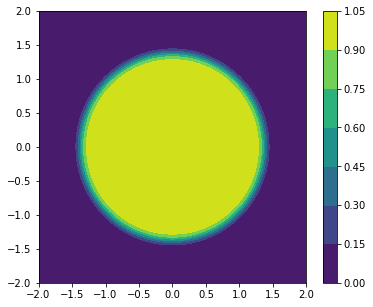

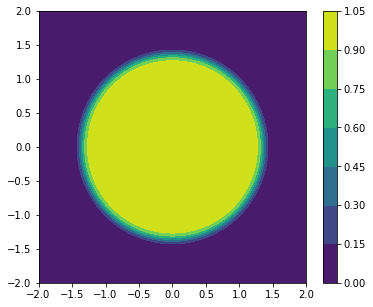

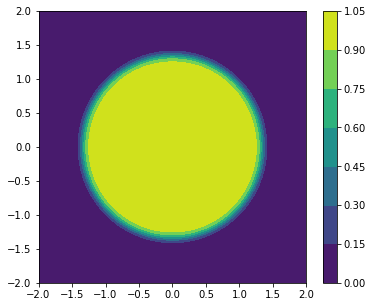

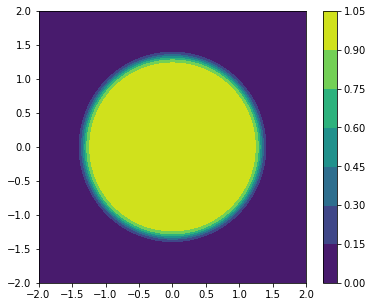

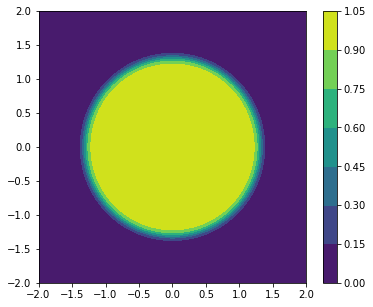

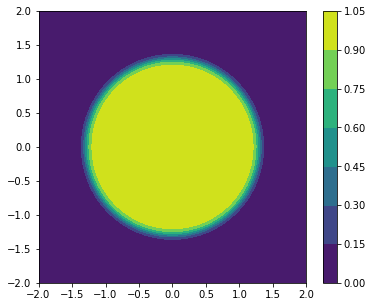

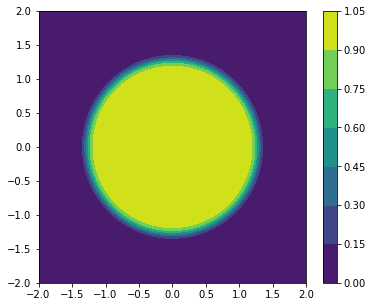

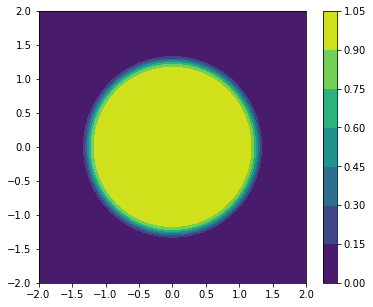

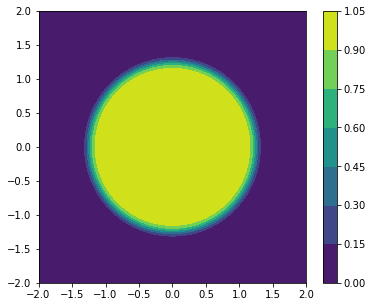

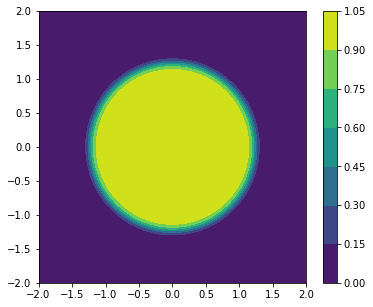

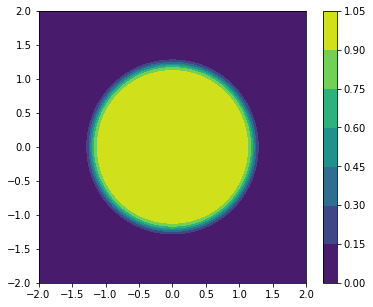

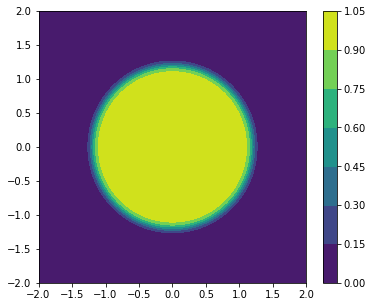

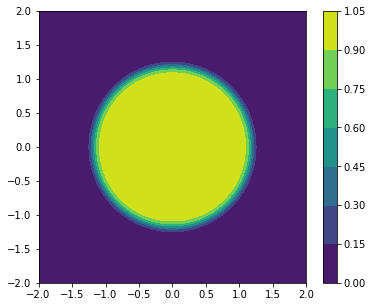

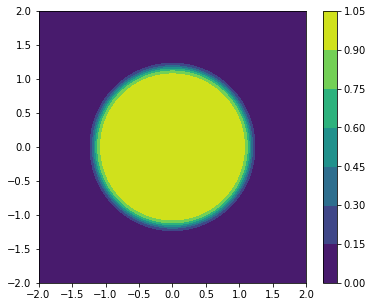

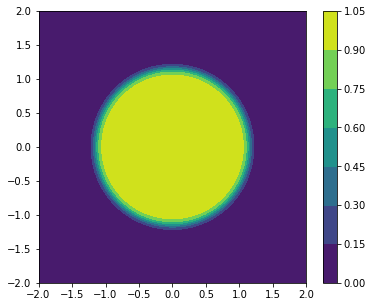

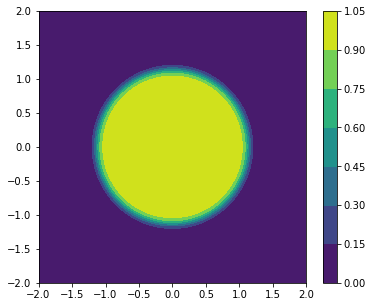

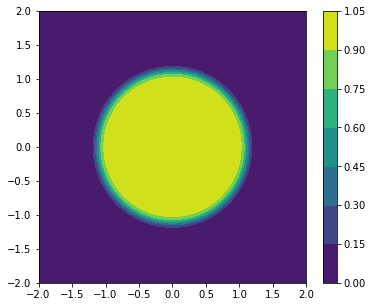

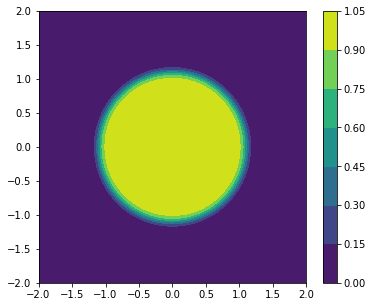

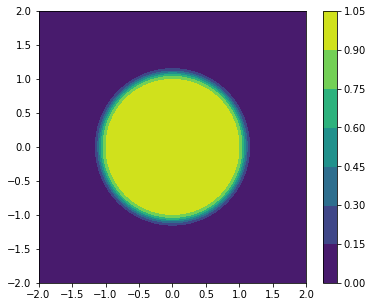

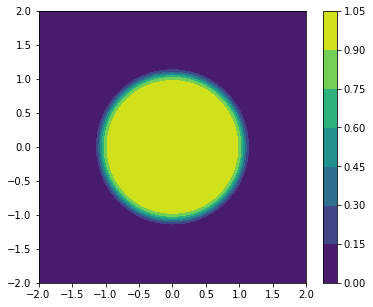

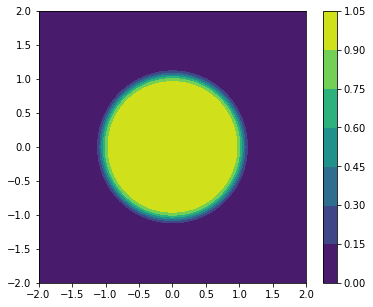

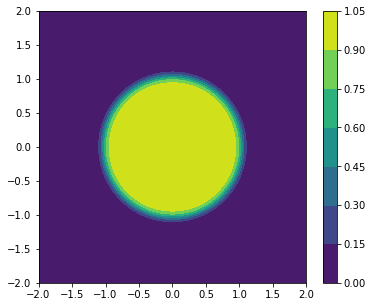

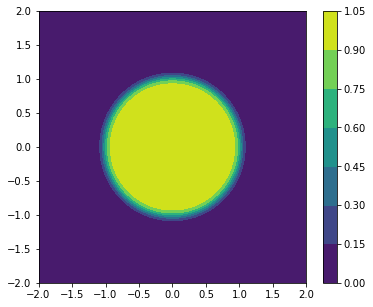

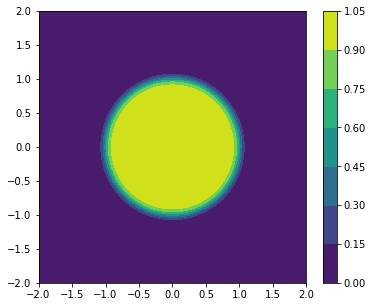

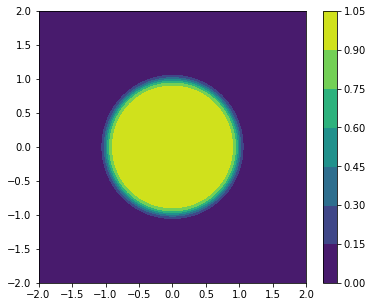

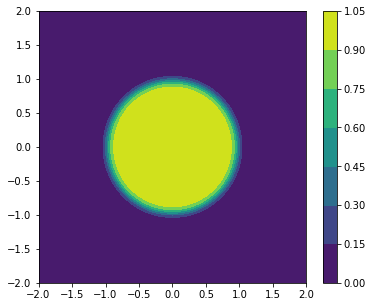

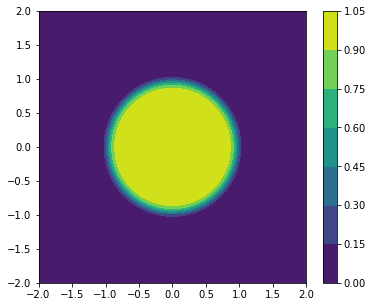

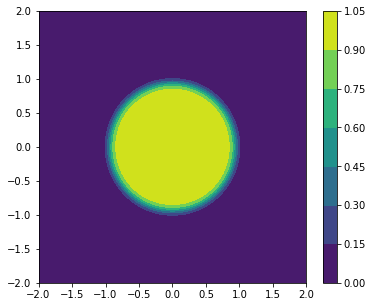

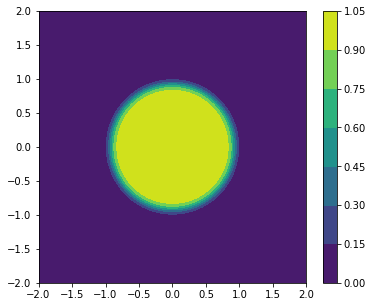

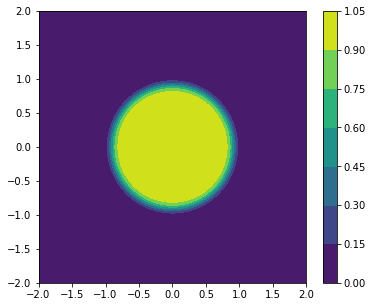

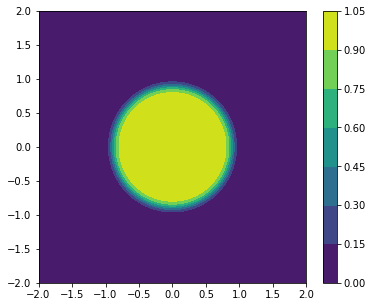

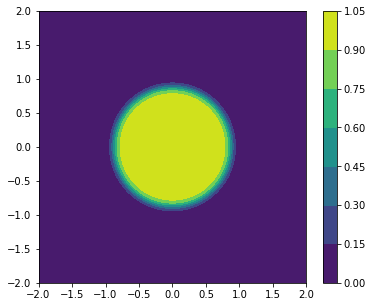

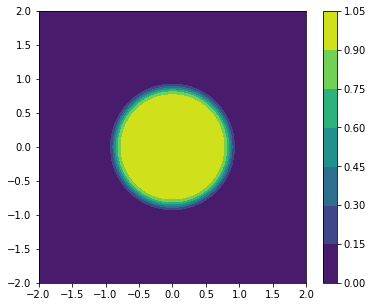

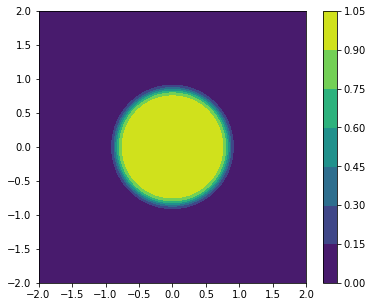

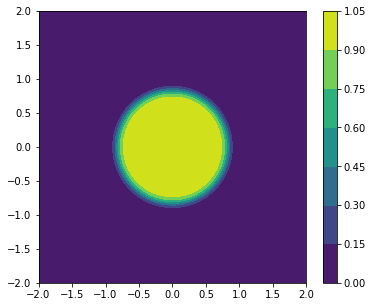

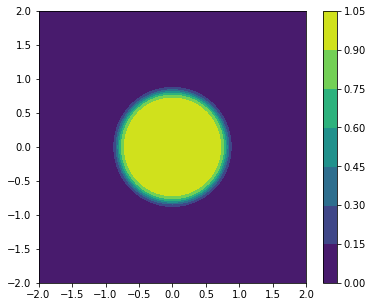

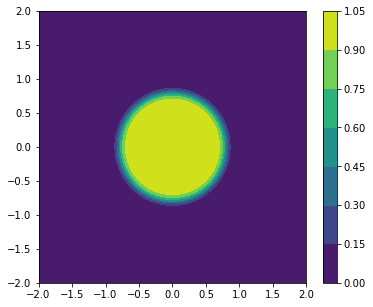

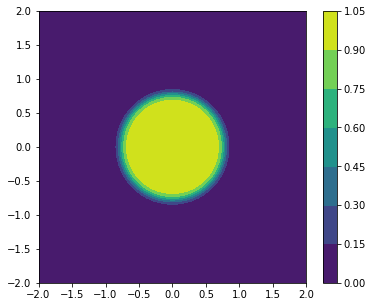

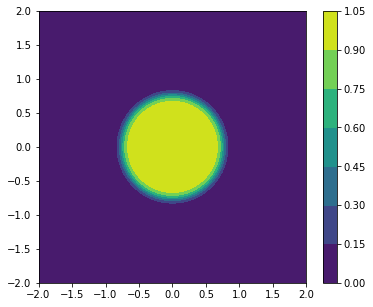

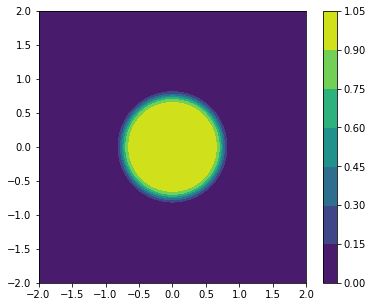

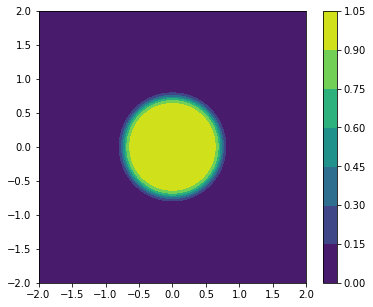

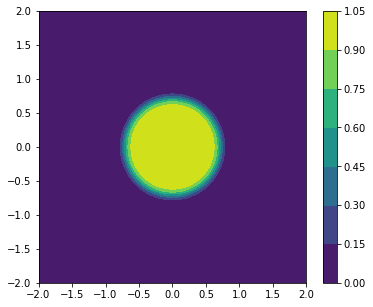

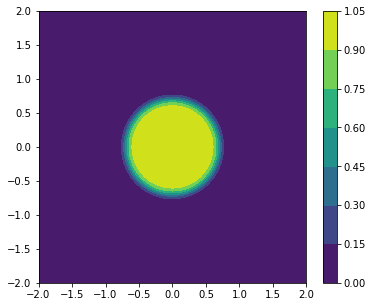

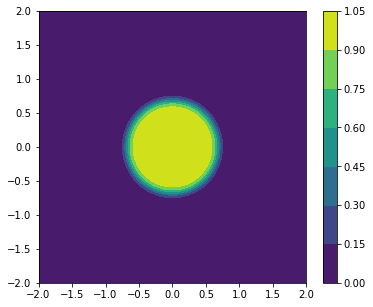

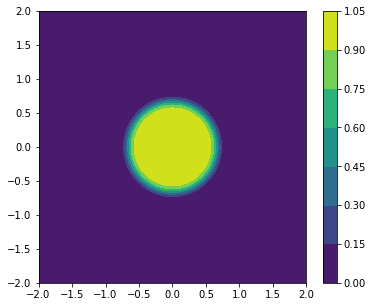

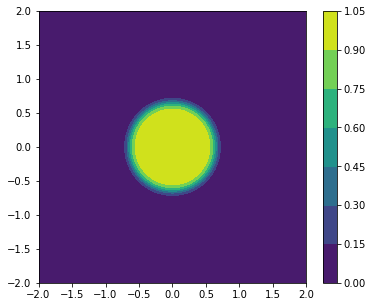

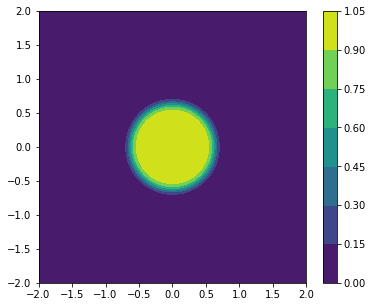

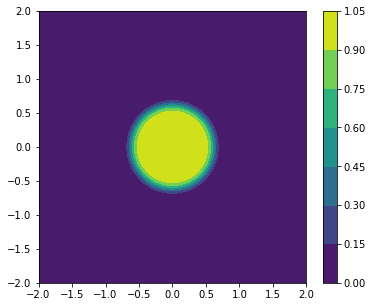

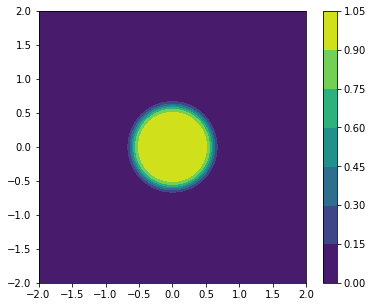

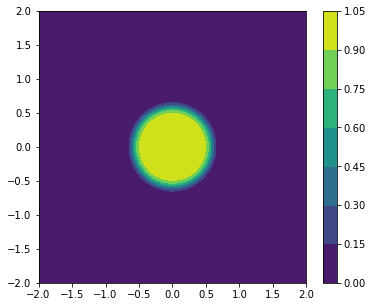

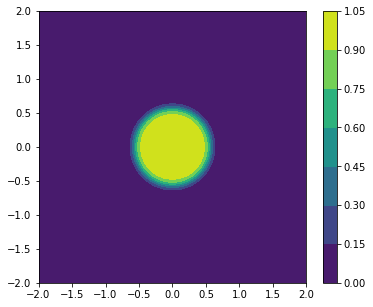

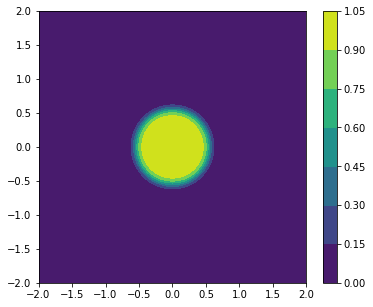

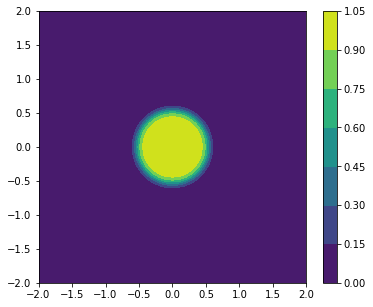

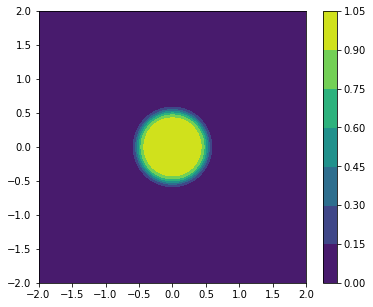

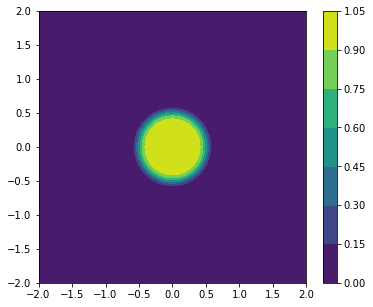

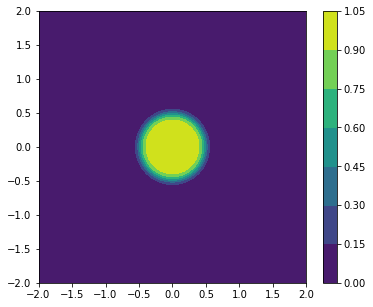

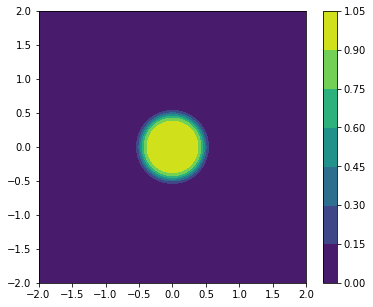

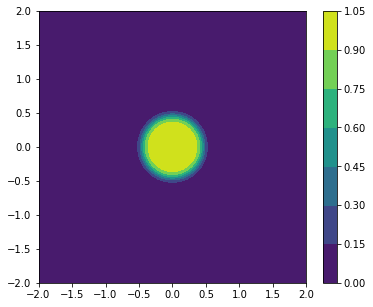

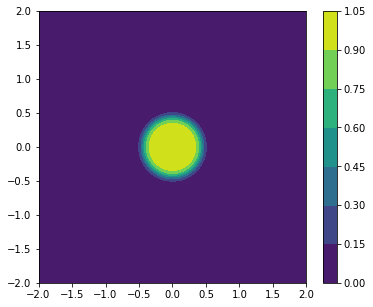

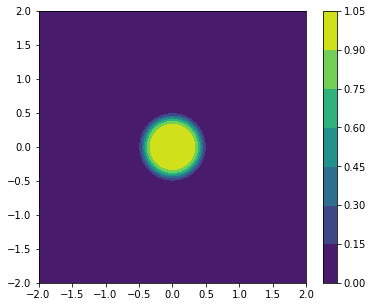

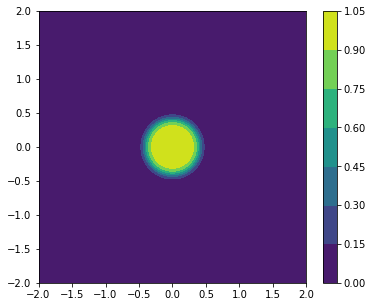

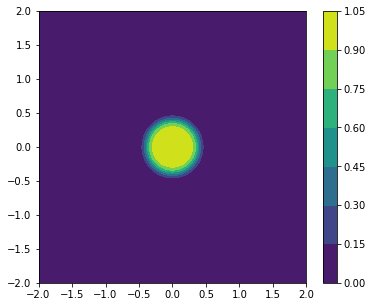

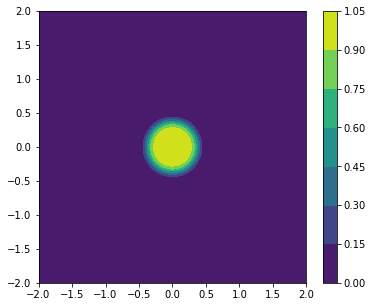

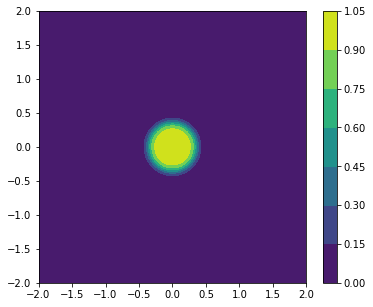

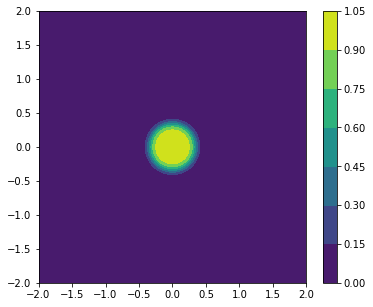

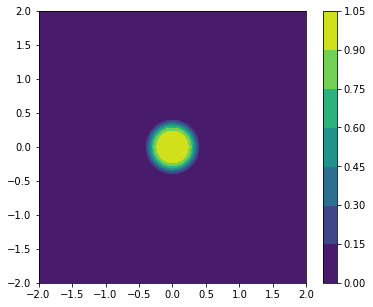

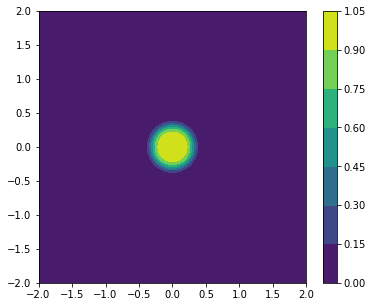

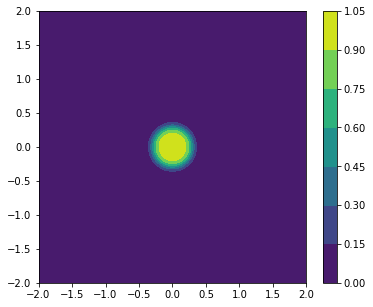

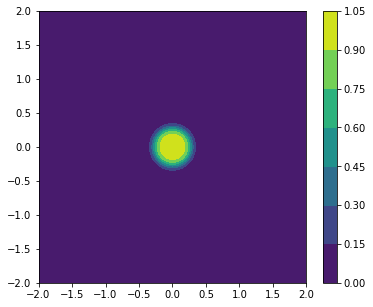

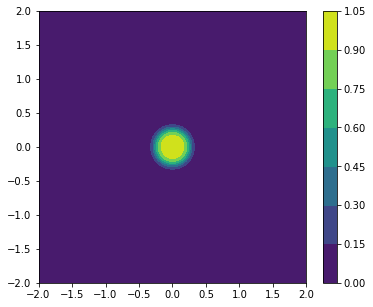

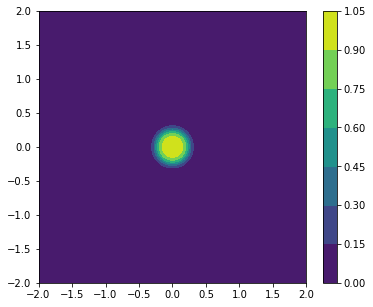

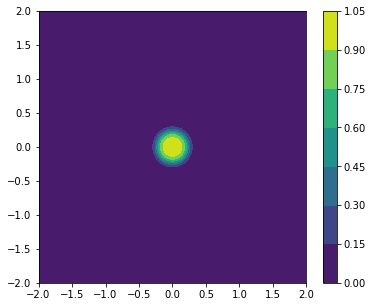

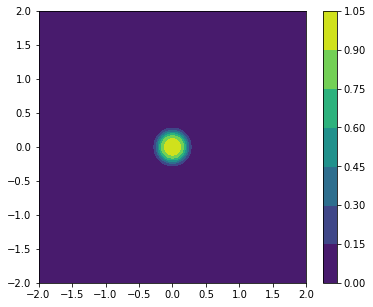

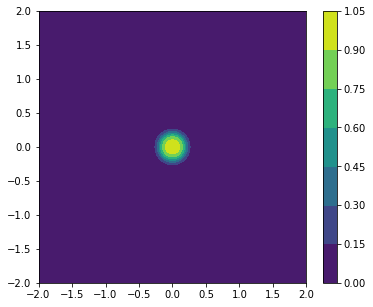

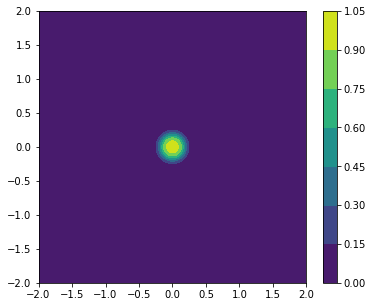

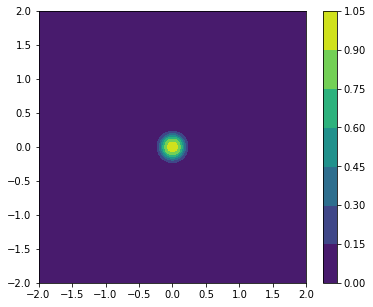

In [226]:
a = np.linspace(-2,2,2**8)  
b = np.linspace(-2,2,2**8) 
xa, xb = np.meshgrid(a,b)
#eps=0.02
for i in range(N):
    fig = plt.figure(figsize =(6, 5)) 
    plt.contourf(xa, xb, X_test[i])  
    plt.colorbar()  
    plt.show()  
    

In [359]:
# Test arc
import copy
def sdarc(xa,xb,sc,ra,rb,eps):
    xa1=copy.deepcopy(xa)
    xb1=copy.deepcopy(xb)
    xa1=abs(xa)
    u=np.zeros((xa1.shape[0],xa1.shape[1]))
    for i in range(xa1.shape[0]):
        for j in range(xa1.shape[1]):
            if sc[1]*xa1[i,j]>sc[0]*xb1[i,j]:
                d=np.sqrt((xa1[i,j]-sc[0]*ra)**2+(xb1[i,j]-sc[1]*ra)**2)-rb
                u[i,j]=0.5*(1-np.tanh(d/(2*eps)))
            else:
                d=abs(np.sqrt((xa1[i,j])**2+(xb1[i,j])**2)-ra)-rb
                u[i,j]=0.5*(1-np.tanh(d/(2*eps)))
    return u

def test_data(f,sc,ra,rb,eps,N,M):
    X=np.empty((N, M, M))
    a1 = np.linspace(-2,2,M)  
    b1 = np.linspace(-2,2,M) 
    xa, xb = np.meshgrid(a1,b1)
    for i in range(N):
        sico=np.array([np.sin(sc[i]),np.cos(sc[i])])
        X[i]=f(xa,xb,sico,ra[i],rb,eps)
    return X 

eps=0.02
M=2**8
N=20
sc=[2.5-i*0.1 for i in range(20)]
ra=[1.5-0.1*i for i in range(20)]
rb=0.2
X_test=test_data(sdarc,sc,ra,rb,eps,N,M)
class MyDataset():
    def __init__(self):
        self.dat = X_test
        
    def __getitem__(self, index):
        data = self.dat[index]
        
        return data, index

    def __len__(self):
        return len(self.dat)
testdata = MyDataset()
testloader = DataLoader(testdata,
                    batch_size=10,
                    shuffle=True,
                    num_workers=1)


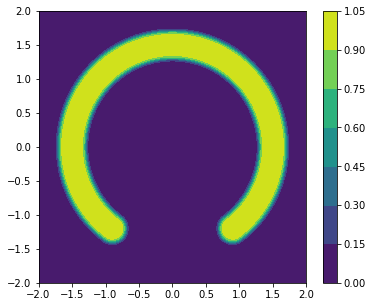

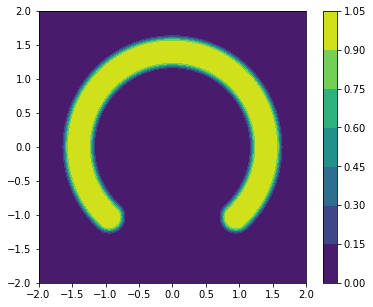

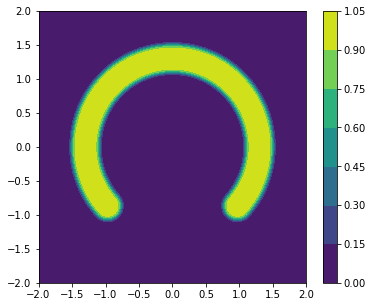

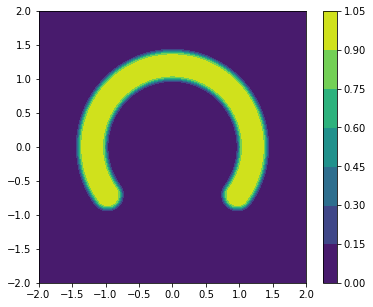

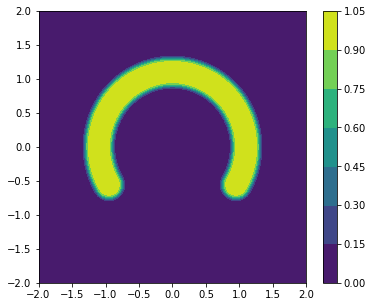

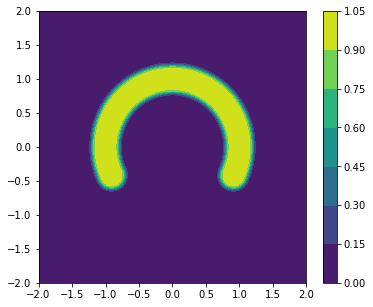

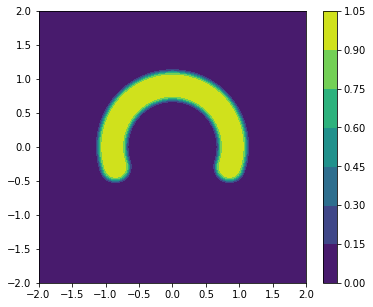

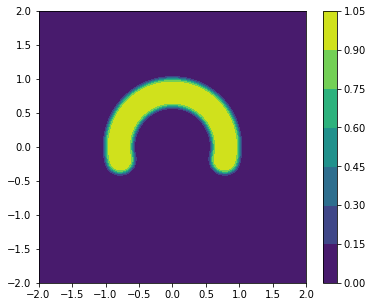

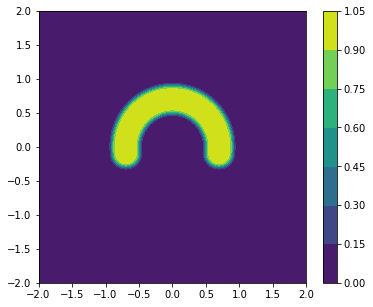

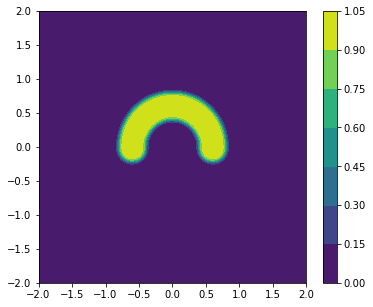

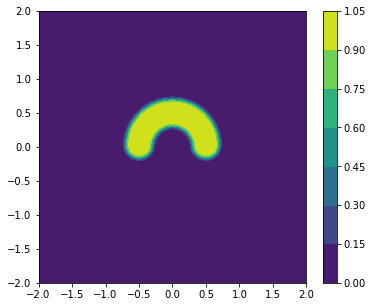

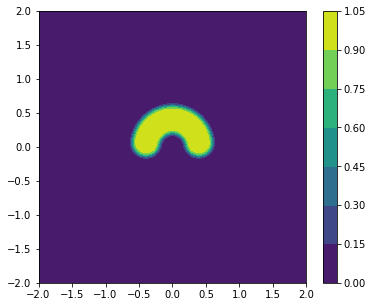

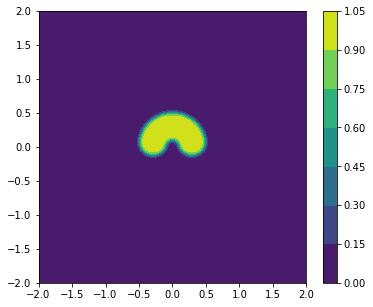

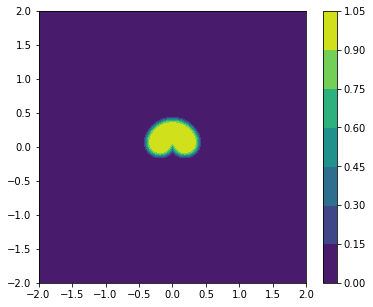

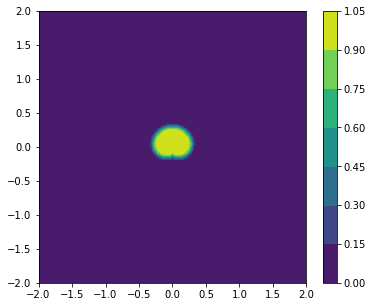

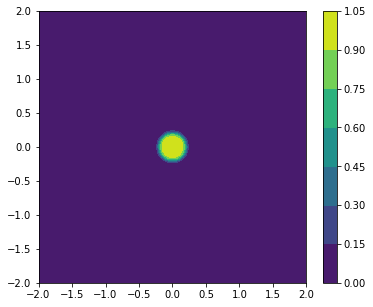

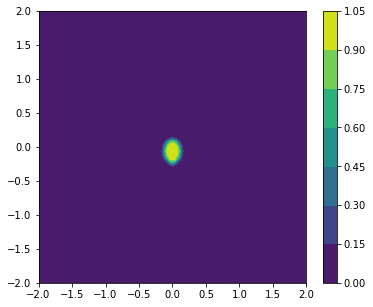

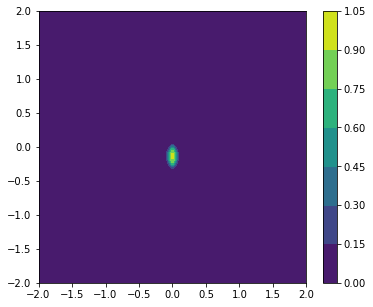

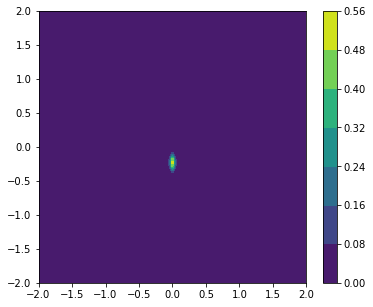

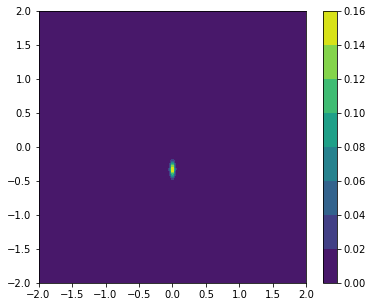

In [360]:
a = np.linspace(-2,2,2**8)  
b = np.linspace(-2,2,2**8) 
xa, xb = np.meshgrid(a,b)
eps=0.01
for i in range(N):
    fig = plt.figure(figsize =(6, 5)) 
    plt.contourf(xa, xb, X_test[i])  
    plt.colorbar()  
    plt.show()  
    

In [224]:
# Test Uneven capsule
import copy
def sdUnevenCapsule(xa,xb,r1,r2,h,eps):
    xa1=copy.deepcopy(xa)
    xb1=copy.deepcopy(xb)
    xa1=abs(xa)
    u=np.zeros((xa1.shape[0],xa1.shape[1]))
    b=round((r1-r2)/h,3)
    a=np.sqrt(1.0-b**2)
    for i in range(xa1.shape[0]):
        for j in range(xb1.shape[1]):
            k=np.dot(np.array([xa1[i,j],xb1[i,j]]), np.array([-b,a]))
            if k<0:
                d=np.sqrt((xa1[i,j])**2+(xb1[i,j])**2)-r1
                u[i,j]=0.5*(1-math.tanh(d/(2*eps)))
            if k>a*h:
                d=np.sqrt((xa1[i,j]-0)**2+(xb1[i,j]-h)**2)-r2
                u[i,j]=0.5*(1-math.tanh(d/(2*eps)))
            else:
                d=np.dot(np.array([xa1[i,j],xb1[i,j]]), np.array([a,b]))-r1
                u[i,j]=0.5*(1-math.tanh(d/(2*eps)))
    return u

def test_data(f,r1,r2,h,eps,N,M):
    X=np.empty((N, M, M))
    a1 = np.linspace(-2,2,M)  
    b1 = np.linspace(-2,2,M) 
    xa, xb = np.meshgrid(a1,b1)
    for i in range(N):
        X[i]=f(xa,xb,r1[i],r2[i],h,eps)
    return X 

eps=0.02
M=2**8
N=10
r1=[0.6,0.55,0.5,0.45,0.43,0.4,0.3,0.2,0.1,0.0]
r2=[0.7,0.7,0.7,0.7,0.7,0.7,0.6,0.5,0.4,0.3]
h=0.3
X_test=test_data(sdUnevenCapsule,r1,r2,h,eps,N,M)
X_test=X_test[0].reshape(1,256,256)
class MyDataset():
    def __init__(self):
        self.dat = X_test
        
    def __getitem__(self, index):
        data = self.dat[index]
        
        return data, index

    def __len__(self):
        return len(self.dat)
testdata = MyDataset()
testloader = DataLoader(testdata,
                    batch_size=10,
                    shuffle=True,
                    num_workers=1)


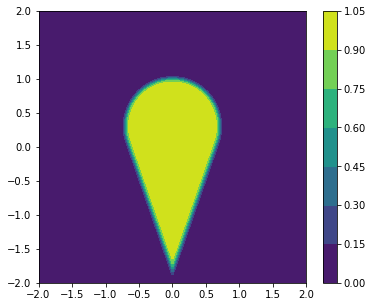

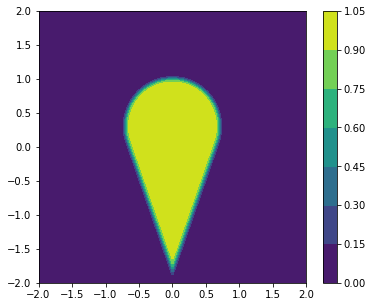

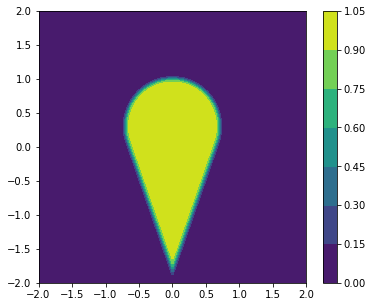

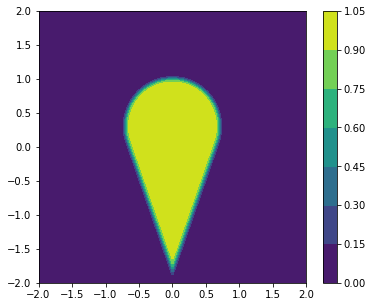

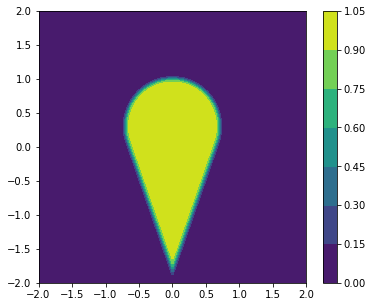

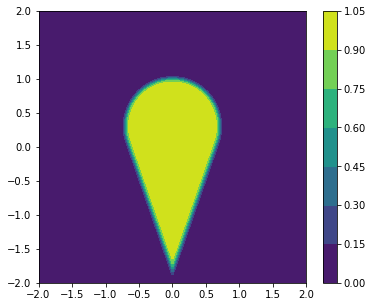

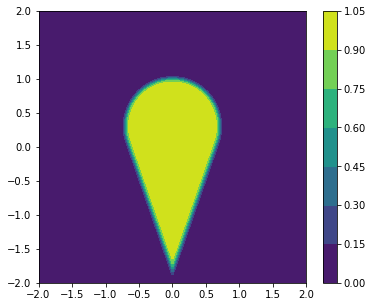

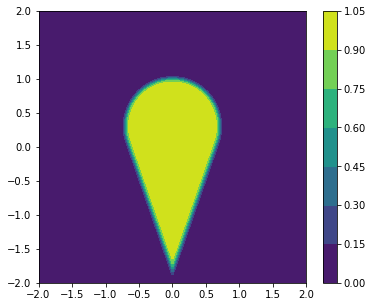

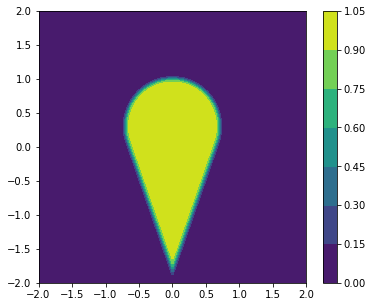

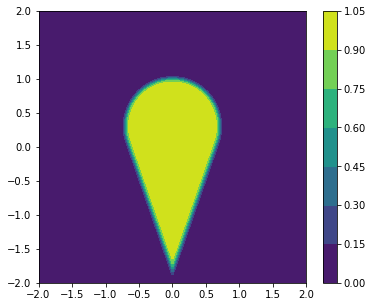

In [200]:
a = np.linspace(-2,2,2**8)  
b = np.linspace(-2,2,2**8) 
xa, xb = np.meshgrid(a,b)
eps=0.01
for i in range(N):
    fig = plt.figure(figsize =(6, 5)) 
    plt.contourf(xa, xb, X_test[i])  
    plt.colorbar()  
    plt.show()     

#### Example model: with only one data set

In [14]:
solu=torch.from_numpy(X[0]).float()
solu2=torch.from_numpy(Y[0]).float()

In [9]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 =  nn.Conv2d(1, 1, 17, stride=1,padding=8,dilation=1)
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x =  self.relu(self.fc1(x.reshape(-1, 1)))
        x =  self.relu(self.fc2(x))
        x =  self.fc3(x)
        x=x.reshape(256,256)
        #return v
        return torch.exp(-(x**2))


In [10]:
model=Net()
print(model)
for param in model.parameters():
    print(param.numel())

Net(
  (conv1): Conv2d(1, 1, kernel_size=(17, 17), stride=(1, 1), padding=(8, 8))
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=1, bias=True)
  (relu): ReLU()
)
289
1
8
8
24
3
3
1


In [11]:
summary(model)

Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            290
├─Linear: 1-2                            16
├─Linear: 1-3                            27
├─Linear: 1-4                            4
├─ReLU: 1-5                              --
Total params: 337
Trainable params: 337
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Conv2d: 1-1                            290
├─Linear: 1-2                            16
├─Linear: 1-3                            27
├─Linear: 1-4                            4
├─ReLU: 1-5                              --
Total params: 337
Trainable params: 337
Non-trainable params: 0

In [19]:

optimizer= torch.optim.Adam(model.parameters(), lr=0.001) 
loss_fn = F.mse_loss

In [24]:
import time
start_time=time.time()
epoch=100
for i in range(epoch):
    current_loss = 0.0
    y_pred = model(solu.reshape(1,256,256))
    loss = loss_fn(y_pred,solu2)
    optimizer.zero_grad()
    loss.backward(retain_graph=True)
    optimizer.step()
    current_loss += loss.item()

total_time=time.time()-start_time
print(f"Duration: {total_time} seconds")
print('Training process has finished.')

Duration: 19.951287269592285 seconds
Training process has finished.


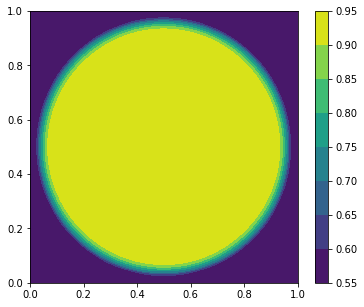

In [25]:
fig = plt.figure(figsize =(13,5)) 
fig.add_subplot(2, 3, 1)
plt.contourf(xa, xb, Y[0])  
plt.colorbar()
plt.title('Exact solution t = {round(time[0], 3)}')
fig.add_subplot(2, 3, 2)
plt.contourf(xa, xb, y_pred.detach().numpy())  
plt.colorbar()
plt.title('Approximation at t = {round(time[0], 3)}')
plt.show()  

#### Using all datasets

In [15]:
#inputs.reshape(10,1,256,256)

In [14]:
import torch.nn as nn
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 =  nn.Conv2d(1, 1, 17, stride=1,padding=8,dilation=1,padding_mode='circular')
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()

    def forward(self,x,batch_size):
        x = self.conv1(x)
        x =  self.relu(self.fc1(x.reshape(-1, 1)))
        x =  self.relu(self.fc2(x))
        x =  self.fc3(x)
        x=x.reshape(batch_size,256,256)
        #return v
        return torch.exp(-(x**2))


In [15]:
model1=Network()
optimizer= torch.optim.Adam(model1.parameters(), lr=0.001) 
loss_fn = F.mse_loss

In [16]:
kernels = model1.conv1.weight.cpu().detach().clone()

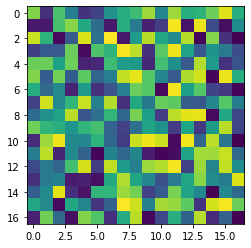

In [18]:
#fig = plt.figure(figsize =(6,5)) 
plt.imshow(kernels[0][0])

In [33]:
print(model1.fc1.weight.cpu().detach().clone())
print(model1.fc1.bias.cpu().detach().clone())

tensor([[ 0.5784],
        [-0.9328],
        [ 0.7871],
        [ 0.0260],
        [-0.4074],
        [-0.4402],
        [-0.1228],
        [ 0.0020]])
tensor([ 0.5866,  0.4072, -0.9443, -0.6862,  0.9971, -0.2722,  0.6518, -0.9422])


In [35]:
print(model1.fc2.weight.cpu().detach().clone())
print(model1.fc2.bias.cpu().detach().clone())

tensor([[-0.2964,  0.1461, -0.1388, -0.0136, -0.3482, -0.0947,  0.0933,  0.0303],
        [ 0.2135, -0.3513, -0.1394, -0.1202, -0.3356,  0.1553, -0.0101,  0.1431],
        [-0.1115,  0.0711, -0.0930, -0.0695,  0.2087,  0.2519, -0.2090, -0.3428]])
tensor([ 0.3031, -0.0766, -0.2926])


In [37]:
print(model1.fc3.weight.cpu().detach().clone())
print(model1.fc3.bias.cpu().detach().clone())

tensor([[-0.5068,  0.2793, -0.3278]])
tensor([-0.2358])


In [34]:
#summary(model1)

In [242]:
import time
train_losses=[]
test_losses=[]
start_time=time.time()
epoch=4
batch_size=10
T=torch.empty(100,256,256)
Te=torch.empty(100,256,256)
for i in range(epoch):
    current_loss = 0.0
    for j, (data, idx) in enumerate(loader,0):
        inputs, y = data[0],data[1]
        y_pred = model1(inputs.reshape(batch_size,1,256,256).float(),batch_size)
        T[idx]=y_pred
        loss = loss_fn(y_pred,y.float())
        optimizer.zero_grad()
        loss.backward(retain_graph=False)
        optimizer.step()
        current_loss += loss.item()
        if j % 20 == 0:
            print(f" Epoch {i+1}, Batch:{j+1}, Loss: {current_loss}")
            current_loss = 0.0
    train_losses.append(loss)
total_time=time.time()-start_time
print(f"Duration: {total_time} seconds")
print('Training process has finished.')

 Epoch 1, Batch:1, Loss: 0.3623671531677246
 Epoch 2, Batch:1, Loss: 0.402594655752182
 Epoch 3, Batch:1, Loss: 0.37933191657066345
 Epoch 4, Batch:1, Loss: 0.39617598056793213
Duration: 20.302536010742188 seconds
Training process has finished.


In [243]:
PATH = './train_test.pth'
torch.save(model1.state_dict(), PATH)

In [176]:
# Test all
start_time=time.time()
#model2=Network()
#model2.load_state_dict(torch.load(PATH))
#model2.eval()
Te=torch.empty(100,256,256)
batch_size=10
model2=Network()
model2.load_state_dict(torch.load(PATH))
with torch.no_grad():
    for j, (testdata, idx) in enumerate(testloader,0):
        x_test = testdata
        y_pred = model2(x_test.reshape(batch_size,1,256,256).float(),batch_size)
        Te[idx]=y_pred
        #loss1 = loss_fn(y_pred,y_test.float())
        #test_losses.append(loss1)
    
total_time=time.time()-start_time
print(f"Duration: {total_time} seconds")
print('Test process has finished.')

Duration: 0.865462064743042 seconds
Test process has finished.


In [248]:
# Test single
start_time=time.time()
#model2=Network()
#model2.load_state_dict(torch.load(PATH))
#model2.eval()
Te=torch.empty(100,256,256)
batch_size=1
for i in range(1,100):
    model2=Network()
    model2.load_state_dict(torch.load(PATH))
    with torch.no_grad():
        for j, (testdata, idx) in enumerate(testloader,0):
            x_test= testdata
            Te[0]=x_test
            x_testi=Te[i-1]
            y_pred = model2(x_testi.reshape(batch_size,1,256,256).float(),batch_size)
            Te[i]=y_pred
        #loss1 = loss_fn(y_pred,y_test.float())
        #test_losses.append(loss1)
    
total_time=time.time()-start_time
print(f"Duration: {total_time} seconds")
print('Test process has finished.')

Duration: 8.967199802398682 seconds
Test process has finished.


In [249]:
import matplotlib.pyplot as plt

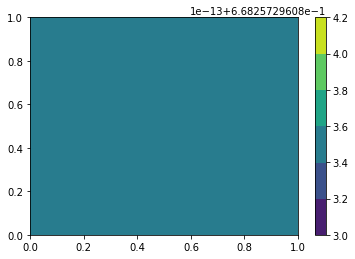

In [251]:
a1 = np.linspace(0,1,2**8)  
b1 = np.linspace(0,1,2**8) 
xa1, xb1 = np.meshgrid(a1,b1)
plt.contourf(xa1, xb1, Te[7].detach().numpy())  
plt.colorbar()
plt.show()

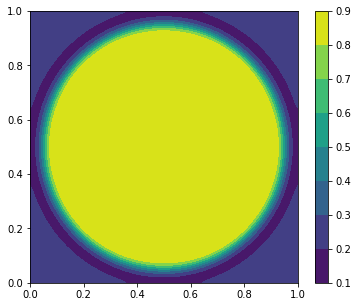

In [22]:
fig = plt.figure(figsize =(13,5)) 
fig.add_subplot(2, 3, 1)
plt.contourf(xa, xb, Y[0])  
plt.colorbar()
plt.title(f'Exact solution at t = {round(time[0], 3)}')
fig.add_subplot(2, 3, 2)
plt.contourf(xa, xb, T[0].numpy())  
plt.colorbar()
plt.title(f'Approximation at t = {round(time[0], 3)}')
plt.show()  

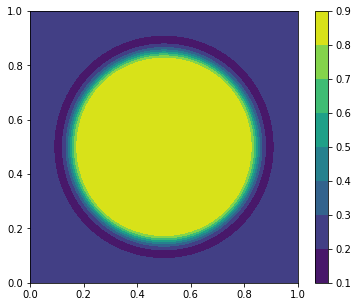

In [23]:
fig = plt.figure(figsize =(13,5)) 
fig.add_subplot(2, 3, 1)
plt.contourf(xa, xb, Y[25])  
plt.colorbar()
plt.title(f'Exact solution at t = {round(time[25], 3)}')
fig.add_subplot(2, 3, 2)
plt.contourf(xa, xb, T[25].detach().numpy())  
plt.colorbar()
plt.title(f'Approximation at t = {round(time[25], 3)}')
plt.show()  

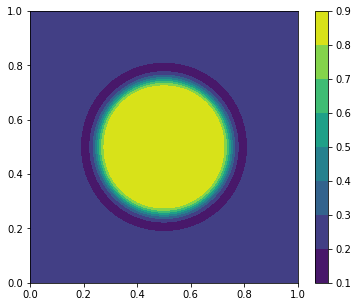

In [24]:
fig = plt.figure(figsize =(13,5)) 
fig.add_subplot(2, 3, 1)
plt.contourf(xa, xb, Y[50])  
plt.colorbar()
plt.title(f'Exact solution at t = {round(time[50], 3)}')
fig.add_subplot(2, 3, 2)
plt.contourf(xa, xb, T[50].detach().numpy())  
plt.colorbar()
plt.title(f'Approximation at t = {round(time[50], 3)}')
plt.show()  

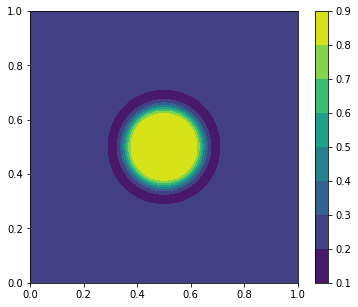

In [25]:
fig = plt.figure(figsize =(13,5)) 
fig.add_subplot(2, 3, 1)
plt.contourf(xa, xb, Y[75])  
plt.colorbar()
plt.title(f'Exact solution at t = {round(time[75], 3)}')
fig.add_subplot(2, 3, 2)
plt.contourf(xa, xb, T[75].detach().numpy())  
plt.colorbar()
plt.title(f'Approximation t = {round(time[75], 3)}')
plt.show()  

In [ ]:
fig = plt.figure(figsize =(13,5)) 
fig.add_subplot(2, 3, 1)
plt.contourf(xa, xb, Y[99])  
plt.colorbar()
plt.title(f'Exact solution at t = {round(time[99], 3)}')
fig.add_subplot(2, 3, 2)
plt.contourf(xa, xb, T[99].detach().numpy())  
plt.colorbar()
plt.title(f'Approximation at t = {round(time[99], 3)}')
plt.show()  

In [ ]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 4, 1)
plt.contourf(xa, xb, Y[0])  
#plt.colorbar()
plt.title(f't = {round(time[0], 3)}')

fig.add_subplot(2, 4, 2)
plt.contourf(xa, xb, Y[33])  
#plt.colorbar()
plt.title(f't = {round(time[33], 3)}')

fig.add_subplot(2, 4, 3)
plt.contourf(xa, xb, Y[66])  
plt.colorbar()
plt.title(f't = {round(time[66], 3)}')

fig.add_subplot(2, 4, 4)
plt.contourf(xa, xb, Y[99])  
plt.colorbar()
plt.title(f't = {round(time[99], 3)}')


fig.add_subplot(2, 4, 5)
plt.contourf(xa, xb, T[0].detach().numpy())  
#plt.colorbar()
plt.title(f't = {round(time[0], 3)}')

fig.add_subplot(2, 4, 6)
plt.contourf(xa, xb, T[33].detach().numpy())  
#plt.colorbar()
plt.title(f't = {round(time[33], 3)}')

fig.add_subplot(2, 4, 7)
plt.contourf(xa, xb, T[66].detach().numpy())  
#plt.colorbar()
plt.title(f't = {round(time[66], 3)}')

fig.add_subplot(2, 4, 8)
plt.contourf(xa, xb, T[99].detach().numpy())  
#plt.colorbar()
plt.title(f't = {round(time[99], 3)}')

In [ ]:
### Error plot
from sklearn.metrics import mean_squared_error as mse
error=mse(y,T.detach().numpy())

In [ ]:
fig = plt.figure(figsize=(12, 5))
plt.plot(time,error,label='learning error with $_{\theta,1}^{NN}$')
plt.title('L2 error')
plt.savefig('err.png')

In [ ]:
Te=torch.empty(100,256,256)

        current_loss += loss.item()
total_time=time.time()-start_time
print(f"Duration: {total_time} seconds")
print('Test process has finished.')
    

### Neural Network $S_{\theta,2}^{NN}$

#### Class residual: Add residual block that returns f(x)+x for a given model f

In [24]:
class MLP1(nn.Module):
    def __init__(self, input_size=1, output_size=1,identity_downsample=None):
        super(MLP1, self).__init__()
        self.lin1 = nn.Linear(input_size,8)
        self.lin2 = nn.Linear(8,3)
        self.lin3 = nn.Linear(3,output_size)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.lin1(x.reshape(-1, 1)))
        x = self.relu(self.lin2(x))
        x = self.lin3(x)
        x=x.reshape(10,1,256,256)
        x=torch.exp(-(x**2))
        return x

In [25]:
class Residual(nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    
    def forward(self, data):
        x=self.model(data)
        x=x+data
        return x

In [26]:
class M1(nn.Module):
    def __init__(self):
        super(M1, self).__init__()
        self.conv1 =  nn.Conv2d(1, 1, 17, stride=1,padding=8,dilation=1,padding_mode='circular')
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x =  self.relu(self.fc1(x.reshape(-1, 1)))
        x =  self.relu(self.fc2(x))
        x =  self.fc3(x)
        x=x.reshape(10,1,256,256)
        x= torch.exp(-(x**2))
        return x

In [27]:
class M2(nn.Module):
    def __init__(self):
        super(M2, self).__init__()
        self.conv1 =  nn.Conv2d(1, 1, 17, stride=1,padding=8,dilation=1,padding_mode='circular')
        self.fc1 = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 3)
        self.fc3 = nn.Linear(3, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x =  self.relu(self.fc1(x.reshape(-1, 1)))
        x =  self.relu(self.fc2(x))
        x =  self.fc3(x)
        x=x.reshape(10,256,256)
        x= torch.exp(-(x**2))
        return x

In [28]:
class MyEnsemble(nn.Module):
    def __init__(self, modelA, modelB,modelC):
        super(MyEnsemble, self).__init__()
        self.modelA = modelA
        self.modelB = modelB
        self.modelC = modelC
        
    def forward(self, x):
        y1=self.modelA(x)
        y2=self.modelB(x)
        y3=self.modelC(y1+y2)
        return y3

In [29]:
mode=MLP1()
modelA=Residual(mode)
modelB=M1()
modelC=M2()
finalmodel=MyEnsemble(modelA, modelB,modelC)

In [30]:
summary(finalmodel)

Layer (type:depth-idx)                   Param #
├─Residual: 1-1                          --
|    └─MLP1: 2-1                         --
|    |    └─Linear: 3-1                  16
|    |    └─Linear: 3-2                  27
|    |    └─Linear: 3-3                  4
|    |    └─ReLU: 3-4                    --
├─M1: 1-2                                --
|    └─Conv2d: 2-2                       290
|    └─Linear: 2-3                       16
|    └─Linear: 2-4                       27
|    └─Linear: 2-5                       4
|    └─ReLU: 2-6                         --
├─M2: 1-3                                --
|    └─Conv2d: 2-7                       290
|    └─Linear: 2-8                       16
|    └─Linear: 2-9                       27
|    └─Linear: 2-10                      4
|    └─ReLU: 2-11                        --
Total params: 721
Trainable params: 721
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Residual: 1-1                          --
|    └─MLP1: 2-1                         --
|    |    └─Linear: 3-1                  16
|    |    └─Linear: 3-2                  27
|    |    └─Linear: 3-3                  4
|    |    └─ReLU: 3-4                    --
├─M1: 1-2                                --
|    └─Conv2d: 2-2                       290
|    └─Linear: 2-3                       16
|    └─Linear: 2-4                       27
|    └─Linear: 2-5                       4
|    └─ReLU: 2-6                         --
├─M2: 1-3                                --
|    └─Conv2d: 2-7                       290
|    └─Linear: 2-8                       16
|    └─Linear: 2-9                       27
|    └─Linear: 2-10                      4
|    └─ReLU: 2-11                        --
Total params: 721
Trainable params: 721
Non-trainable params: 0

In [31]:
optimizer= torch.optim.Adam(finalmodel.parameters(), lr=0.001) 
loss_fn = F.mse_loss

In [32]:
import time
start_time=time.time()
epoch=4
batch_size=10
T=torch.empty(100,256,256)
for i in range(epoch):
    current_loss = 0.0
    for j, (data, idx) in enumerate(loader,0):
        inputs, y = data[0],data[1]
        y_pred = finalmodel(inputs.reshape(batch_size,1,256,256).float())
        T[idx]=y_pred
        loss = loss_fn(y_pred,y.float())
        optimizer.zero_grad()
        loss.backward(retain_graph=False)
        optimizer.step()
        current_loss += loss.item()
        if j % 20 == 0:
            print(f" Epoch {i+1}, Batch:{j+1}, Loss: {current_loss}")
            current_loss = 0.0
total_time=time.time()-start_time
print(f"Duration: {total_time} seconds")
print('Training process has finished.')

 Epoch 1, Batch:1, Loss: 0.46058565378189087
 Epoch 2, Batch:1, Loss: 0.2887781262397766
 Epoch 3, Batch:1, Loss: 0.19696179032325745
 Epoch 4, Batch:1, Loss: 0.18950769305229187
Duration: 221.02040815353394 seconds
Training process has finished.


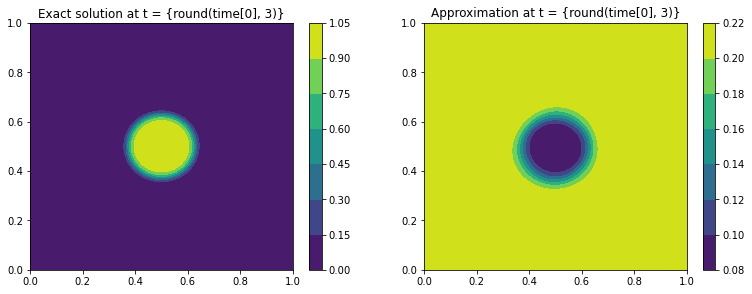

In [35]:
fig = plt.figure(figsize =(20,10)) 
fig.add_subplot(2, 3, 1)
plt.contourf(xa, xb, Y[80])  
plt.colorbar()
plt.title('Exact solution at t = {round(time[0], 3)}')
fig.add_subplot(2, 3, 2)
plt.contourf(xa, xb, T[80].detach().numpy())  
plt.colorbar()
plt.title('Approximation at t = {round(time[0], 3)}')
plt.show()  

In [ ]:
import torch
import torch.nn as nn
from functools import partial
from dataclasses import dataclass
from collections import OrderedDict

In [ ]:
class Conv2dAuto(nn.Conv2d):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.padding =  (self.kernel_size[0] // 2, self.kernel_size[1] // 2) # dynamic add padding based on the kernel_size
        
conv3x3 = partial(Conv2dAuto, kernel_size=3, bias=False)      

In [ ]:
conv = conv3x3(in_channels=32, out_channels=64)
print(conv)
del conv

Conv2dAuto(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


In [ ]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.in_channels, self.out_channels =  in_channels, out_channels
        self.blocks = nn.Identity()
        self.shortcut = nn.Identity()   
    
    def forward(self, x):
        residual = x
        if self.should_apply_shortcut: residual = self.shortcut(x)
        x = self.blocks(x)
        x += residual
        return x
    
    @property
    def should_apply_shortcut(self):
        return self.in_channels != self.out_channels


In [ ]:
dummy = torch.ones((1, 1, 1, 1))
block = ResidualBlock(1, 64)
block(dummy)

tensor([[[[2.]]]])

In [ ]:
from collections import OrderedDict

class ResNetResidualBlock(ResidualBlock):
    def __init__(self, in_channels, out_channels, expansion=1, downsampling=1, conv=conv3x3, *args, **kwargs):
        super().__init__(in_channels, out_channels)
        self.expansion, self.downsampling, self.conv = expansion, downsampling, conv
        self.shortcut = nn.Sequential(OrderedDict(
        {
            'conv' : nn.Conv2d(self.in_channels, self.expanded_channels, kernel_size=1,
                      stride=self.downsampling, bias=False),
            'bn' : nn.BatchNorm2d(self.expanded_channels)
            
        })) if self.should_apply_shortcut else None
        
        
    @property
    def expanded_channels(self):
        return self.out_channels * self.expansion
    
    @property
    def should_apply_shortcut(self):
        return self.in_channels != self.expanded_channels

In [ ]:
#ResNetResidualBlock(32, 64)

In [ ]:
from collections import OrderedDict
def conv_bn(in_channels, out_channels, conv, *args, **kwargs):
    return nn.Sequential(OrderedDict({'conv': conv(in_channels, out_channels, *args, **kwargs), 
                          'bn': nn.BatchNorm2d(out_channels) }))


In [ ]:
class ResNetBasicBlock(ResNetResidualBlock):
    expansion = 1
    def __init__(self, in_channels, out_channels, activation=nn.ReLU, *args, **kwargs):
        super().__init__(in_channels, out_channels, *args, **kwargs)
        self.blocks = nn.Sequential(
            conv_bn(self.in_channels, self.out_channels, conv=self.conv, bias=False, stride=self.downsampling),
            activation(),
            conv_bn(self.out_channels, self.expanded_channels, conv=self.conv, bias=False),
        )
    

In [ ]:
dummy = torch.ones((1, 32, 224, 224))

block = ResNetBasicBlock(1, 1)
block(T).shape
#print(block)
torch.exp(-(block(T)**2))

tensor([[[[0.2358, 0.2358, 0.2358,  ..., 0.2358, 0.2358, 0.2358],
          [0.2358, 0.2358, 0.2358,  ..., 0.2358, 0.2358, 0.2358],
          [0.2358, 0.2358, 0.2358,  ..., 0.2358, 0.2358, 0.2358],
          ...,
          [0.2358, 0.2358, 0.2358,  ..., 0.2358, 0.2358, 0.2358],
          [0.2358, 0.2358, 0.2358,  ..., 0.2358, 0.2358, 0.2358],
          [0.2358, 0.2358, 0.2358,  ..., 0.2358, 0.2358, 0.2358]]]],
       grad_fn=<ExpBackward0>)

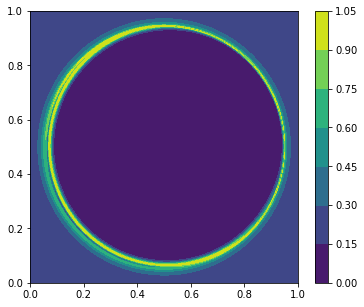

In [ ]:
a1 = np.linspace(0, 1, 256)  
b1 = np.linspace(0, 1, 256) 
xa1, xb1 = np.meshgrid(a1, b1)
sol3=yq.detach().numpy()
fig = plt.figure(figsize =(6, 5)) 
plt.contourf(xa1, xb1, torch.exp(-(block(T)**2)).reshape(256,256).detach().numpy())  
plt.colorbar()  
plt.show()  

In [ ]:
class ResNetBottleNeckBlock(ResNetResidualBlock):
    expansion = 4
    def __init__(self, in_channels, out_channels, activation=nn.ReLU, *args, **kwargs):
        super().__init__(in_channels, out_channels, expansion=4, *args, **kwargs)
        self.blocks = nn.Sequential(
           conv_bn(self.in_channels, self.out_channels, self.conv, kernel_size=1),
             activation(),
             conv_bn(self.out_channels, self.out_channels, self.conv, kernel_size=3, stride=self.downsampling),
             activation(),
             conv_bn(self.out_channels, self.expanded_channels, self.conv, kernel_size=1),
        )
    

In [ ]:
block = ResNetBottleNeckBlock(1, 1)
block(T).shape
#print(block)

torch.Size([1, 4, 256, 256])

In [ ]:
def conv3x3(in_channels, out_channels, stride=1):
    return nn.Conv2d(in_channels, out_channels, kernel_size=3, 
                     stride=stride, padding=1, bias=False)

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(ResidualBlock, self).__init__()
        self.conv1 = conv3x3(in_channels, out_channels, stride)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(out_channels, out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

# ResNet
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1):
        super(ResNet, self).__init__()
        self.in_channels = 1
        self.conv = conv3x3(1, 1)
        self.bn = nn.BatchNorm2d(1)
        self.relu = nn.ReLU(inplace=True)
        self.layer1 = self.make_layer(block, 1, layers[0])
        self.layer2 = self.make_layer(block, 1, layers[1], 2)
        self.layer3 = self.make_layer(block, 1, layers[2], 2)
        #self.avg_pool = nn.AvgPool2d(8)
        self.fc = nn.Linear(1, 8)
        self.fc2 = nn.Linear(8, 3)
        self.fc3 = nn.Linear(3, num_classes)
        self.relu = nn.ReLU()
        
    def make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if (stride != 1) or (self.in_channels != out_channels):
            downsample = nn.Sequential(
                conv3x3(self.in_channels, out_channels, stride=stride),
                nn.BatchNorm2d(out_channels))
        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels
        for i in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv(x)
        out = self.bn(out)
        out = self.relu(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        #out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        v=torch.empty(torch.numel(out),1)
        for i in range(torch.numel(out)):
            z=self.relu(self.fc(out[i]))
            z=self.relu(self.fc2(z))
            z=self.fc3(z)
            v[i]=z
        
        #out = self.fc(out)
        return v

In [ ]:
model = ResNet(ResidualBlock,[2,2,2])

In [ ]:
optimizer= torch.optim.Adam(model.parameters(), lr=0.001) 
loss_fn = F.mse_loss